In [1]:
import torch

# Простые тензоры

## Одномерные тензоры

In [2]:
a = torch.ones(3) 
a

tensor([1., 1., 1.])

In [3]:
a[1]

tensor(1.)

In [4]:
float(a[1])

1.0

In [5]:
a[2] = 2
a

tensor([1., 1., 2.])

In [6]:
torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])

tensor([4., 1., 5., 3., 2., 1.])

## Многомерные тензоры

In [7]:
points = torch.tensor([[4., 1.], 
                       [5., 3.], 
                       [2., 1.]])
points

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

In [8]:
points[0]

tensor([4., 1.])

In [9]:
points[0][1] # или points[0, 1] для конкретной точки

tensor(1.)

In [10]:
points.shape # получение формы тензора

torch.Size([3, 2])

In [11]:
torch.zeros(3, 2) # получение двумерного тензора, заполненного нулями

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

## Доступ по индексам

In [12]:
points[1:] # все строки кроме первой + все столбцы (неявно)

tensor([[5., 3.],
        [2., 1.]])

In [13]:
points[1:, :] # все строки после первой + все столбцы (явно)

tensor([[5., 3.],
        [2., 1.]])

In [14]:
points[1:, 0] # все строки кроме первой + первый столбец

tensor([5., 2.])

In [15]:
points[None] # добавление измерение размера 1 (подобно функции unsqueeze)

tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])

# Поименованные тензоры

Часто полезно отслеживать, какое измерение содержит какие данные

In [16]:
from PIL import Image
from torchvision import transforms

img = Image.open("/home/avtotka/Pictures/bagomol.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256), # масштабирование до 256 на 256
    transforms.CenterCrop(224), # обрезка до 224 на 224 по центру
    transforms.ToTensor() # преобразование в тензор
])
img_t = preprocess(img)
img_t.shape # форма [каналы, строки, столбцы]

torch.Size([3, 224, 224])

In [17]:
# формирование батча размерностью 2
img_t_2 = img_t.clone()
batch_t = torch.stack([img_t, img_t_2], dim=0) # объединение изображений в одном батче
batch_t.shape

torch.Size([2, 3, 224, 224])

In [18]:
img_gray_native = img_t.mean(-3) # канал RGB всегда размещают -3 с конца
batch_gray_native = batch_t.mean(-3)
img_gray_native.shape, batch_gray_native.shape # каналы RGB пропали, т.к. были усреднены

(torch.Size([224, 224]), torch.Size([2, 224, 224]))

In [19]:
weights = torch.tensor([0.2126, 0.7152, 0.0722]) # преобразование в оттенки серего https://en.wikipedia.org/wiki/Luma_(video)
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1) # для соразмерности с тензорами изображений
unsqueezed_weights

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]])

In [22]:
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_weights.shape, batch_weights.shape

(torch.Size([3, 224, 224]), torch.Size([2, 3, 224, 224]))

In [21]:
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
img_gray_weighted.shape, batch_gray_weighted.shape

(torch.Size([224, 224]), torch.Size([2, 224, 224]))

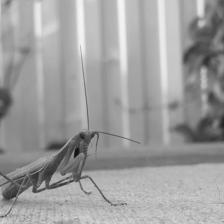

In [27]:
transforms.ToPILImage()(img_gray_weighted) # результат преобразования в градацию серого

### Именование измерений

In [36]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [37]:
img_named = img_t.refine_names(..., 'channels', 'rows', 'columns') # ... для пропуска измерений
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
img_named.shape, img_named.names

(torch.Size([3, 224, 224]), ('channels', 'rows', 'columns'))

In [38]:
batch_named.shape, batch_named.names

(torch.Size([2, 3, 224, 224]), (None, 'channels', 'rows', 'columns'))

In [44]:
weights_aligned = weights_named.align_as(img_named) # для соразмерности с img_named
weights_aligned.shape, weight_aligned.name 

(torch.Size([3, 1, 1]), None)

In [45]:
gray_named = (img_named * weights_aligned).sum('channels')
gray_named.shape, gray_named.names

(torch.Size([224, 224]), ('rows', 'columns'))

In [46]:
gray_plain = gray_named.rename(None) # для снятия всех именований
gray_plain.shape, gray_plain.names

(torch.Size([224, 224]), (None, None))